#### Cargamos los paquetes a utilizar

In [35]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


#### Cargamos nuestros dataset

In [36]:
df = pd.read_csv("./data/all_seasons_data.csv",low_memory=False)
df.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,blspp,currp,pss,tn,avg,ip,ren,slug,Temporada,Jornada
0,0.0,14.0,0.0,79,3,Athletic Club,0,14,90,1,...,188,99,NaN,Athletic Club,14.0,1,0.70,capa,Season2020,Week10
1,0.0,13.0,0.0,793,2,Atlético de Madrid,0,13,89,1,...,57,207,NaN,Atlético de Madrid,13.0,2,62.74,carrasco,Season2020,Week10
2,0.0,13.0,0.0,268,16,Real Sociedad,0,13,74,0,...,107,141,NaN,Real Sociedad,13.0,3,2.96,januzaj,Season2020,Week10
3,0.0,12.0,0.0,81,3,Athletic Club,0,12,70,1,...,170,148,NaN,Athletic Club,12.0,4,6.68,muniain,Season2020,Week10
4,0.0,12.0,0.0,576,21,D. Alavés,0,12,72,1,...,178,136,NaN,D. Alavés,12.0,5,1.98,lucas-perez,Season2020,Week10


In [37]:
df.columns

Index(['p', 'wp', 'ap', 'playerId', 'tid', 'nm', 'wn', 'tp', 'mins', 'g', 'ga',
       'oaa', 'pae', 'pw', 'ps', 's', 'ec', 'pf', 'og', 'gc', 'yc', 'syc',
       'rc', 'tsa', 'wc', 'br', 'pla', 'pc', 'pm', 'mv', 'mvd', 'nn', 'ts',
       'm', 'pid', 'lsp', 'blsp', 'blspp', 'currp', 'pss', 'tn', 'avg', 'ip',
       'ren', 'slug', 'Temporada', 'Jornada'],
      dtype='object')

#### Convertimos jornada y temporada a variables que se podrán utilizar

In [38]:
df['Jornada'] = df['Jornada'].str.split('Week').str[1].astype(int)
df['Temporada'] = df['Temporada'].str.split('Season').str[1].astype(int)

##### Function to get the top10 salaries

In [39]:
import matplotlib.cm as cm
def top_10_players(season):
    seasons = df[df['Temporada'] == season]

    average_salary_by_jornada = seasons.groupby('Jornada')['mv'].mean()

    overall_average_salary = average_salary_by_jornada.mean()

    top_players = seasons.groupby('nn').filter(lambda x: x['mv'].mean() > overall_average_salary)

    top_10_players = top_players.groupby('nn')['mv'].mean().nlargest(10)
    return top_10_players

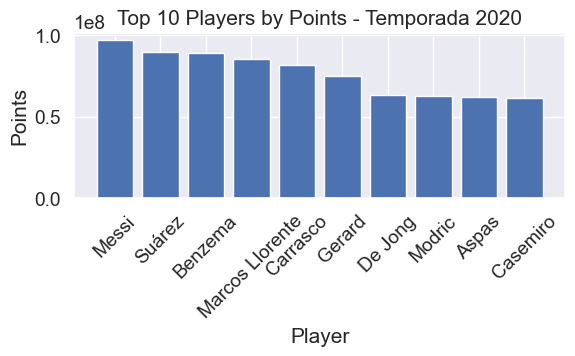

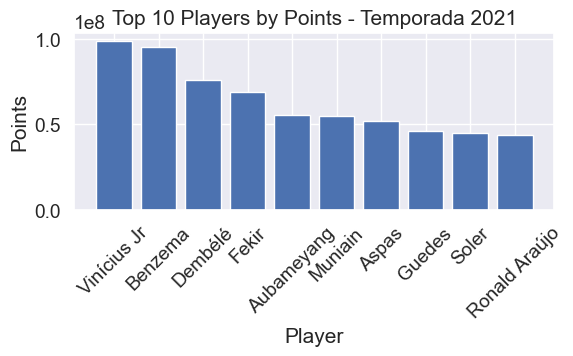

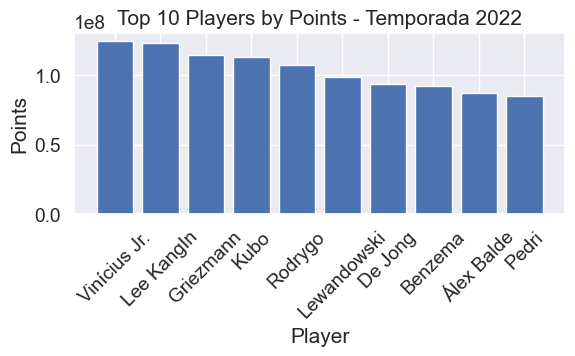

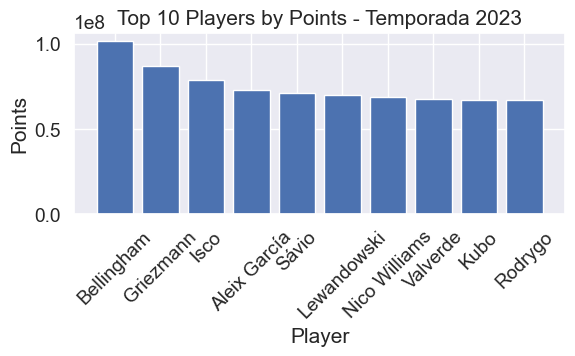

In [40]:
for temporada in df['Temporada'].unique():
    top_10_players_data = top_10_players(temporada)


    player_names = top_10_players_data.index.tolist()
    player_points = top_10_players_data.values.tolist()

    plt.figure(figsize=(6, 4))
    plt.bar(player_names, player_points)
    plt.title(f"Top 10 Players by Points - Temporada {temporada}")
    plt.xlabel("Player")
    plt.ylabel("Points")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Histogramas de la distribución de la media de puntos totales

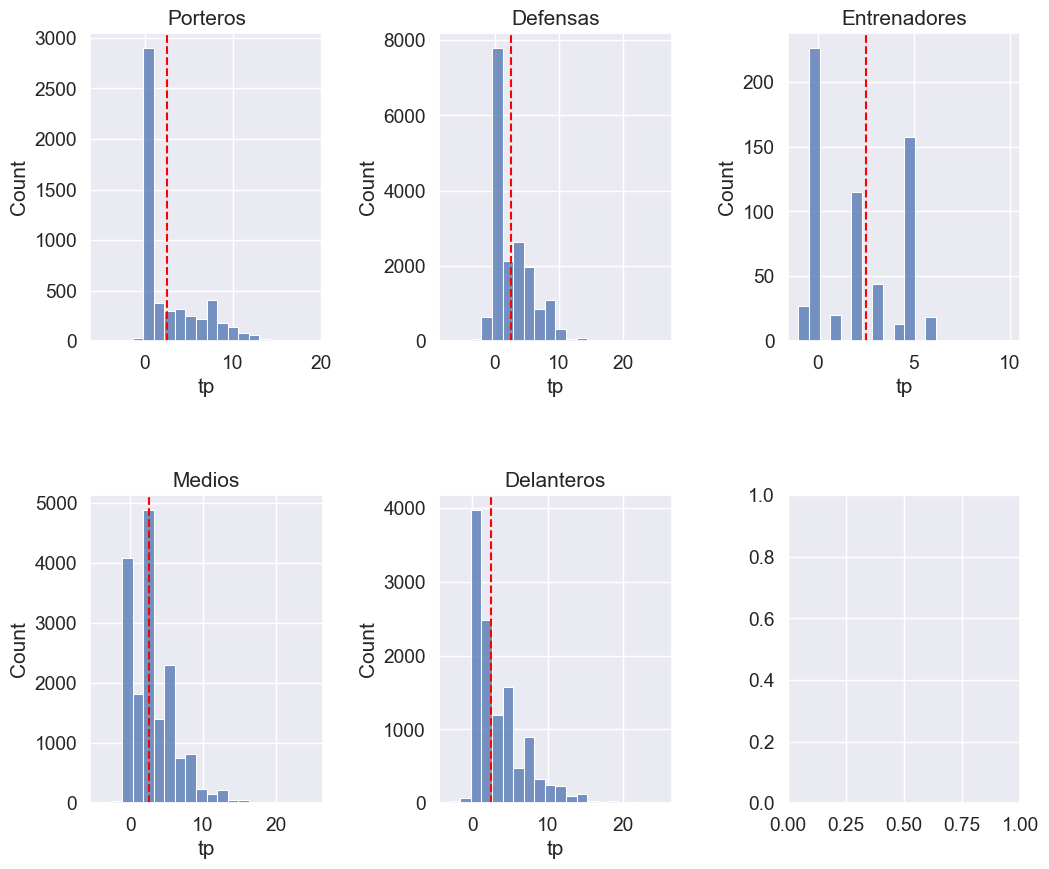

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)


axes[0,0].set_title('Porteros')
sns.histplot(df[df['pid'] == 1]['tp'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,1].set_title('Defensas')
sns.histplot(df[df['pid'] == 2]['tp'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,2].set_title('Entrenadores')
sns.histplot(df[df['pid'] == 5]['tp'], bins=20, ax=axes[0, 2])
axes[0,2].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,0].set_title('Medios')
sns.histplot(df[df['pid'] == 3]['tp'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,1].set_title('Delanteros')
sns.histplot(df[df['pid'] == 4]['tp'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')


plt.show()


##### Histogramas de la distribución de la media de puntos totales

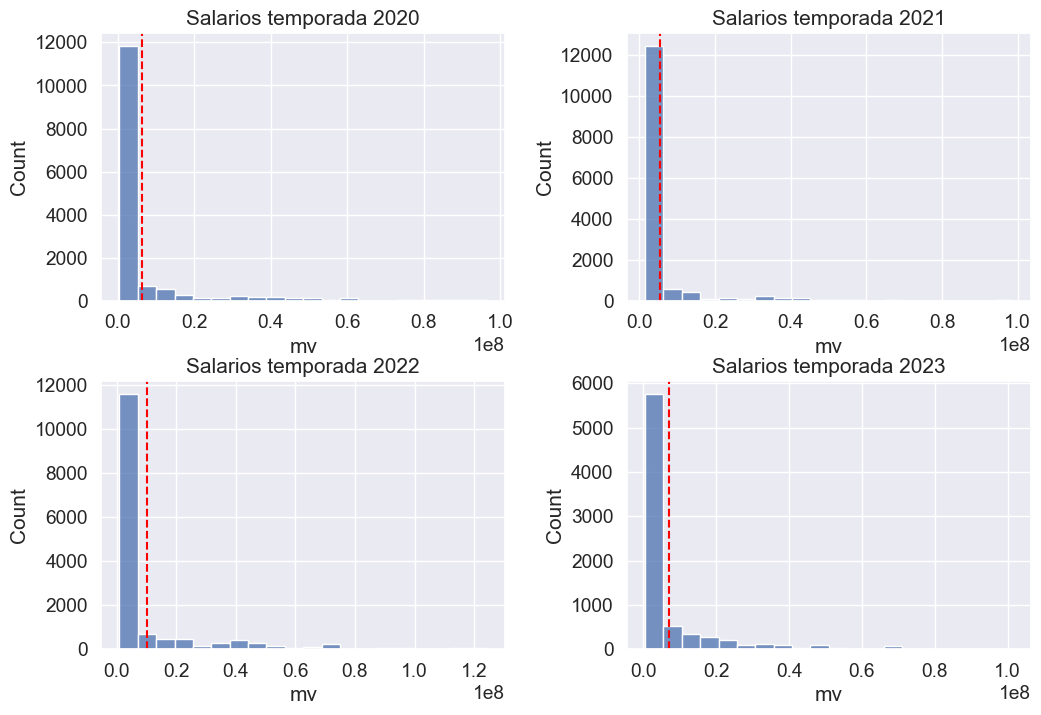

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


axes[0,0].set_title('Salarios temporada 2020')
sns.histplot(df[df['Temporada'] == 2020]['mv'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df[df['Temporada'] == 2020]['mv'].mean(), color='red', linestyle='--')

axes[0,1].set_title('Salarios temporada 2021')
sns.histplot(df[df['Temporada'] == 2021]['mv'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df[df['Temporada'] == 2021]['mv'].mean(), color='red', linestyle='--')

axes[1,0].set_title('Salarios temporada 2022')
sns.histplot(df[df['Temporada'] == 2022]['mv'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df[df['Temporada'] == 2022]['mv'].mean(), color='red', linestyle='--')


axes[1,1].set_title('Salarios temporada 2023')
sns.histplot(df[df['Temporada'] == 2023]['mv'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df[df['Temporada'] == 2023]['mv'].mean(), color='red', linestyle='--')



plt.show()


Text(0.5, 1.0, 'Boxplot of total points')

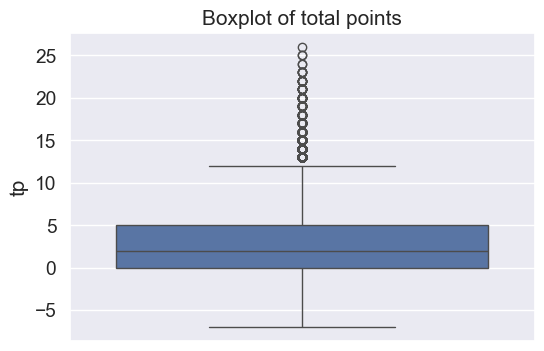

In [43]:
plt.figure(figsize=(6, 4))
g = sns.boxplot(df['tp'])
g.set_title('Boxplot of total points')

### Estadísticas descriptivas

In [44]:
df.describe()

,p,wp,ap,playerId,tid,wn,tp,mins,g,ga,...,pid,lsp,blsp,blspp,currp,avg,ip,ren,Temporada,Jornada
count,44689.0,44689.000000,44689.0,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,...,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,44689.000000,52431.000000,52431.000000
mean,0.0,2.658976,0.0,831.474185,21.001430,1.107456,2.914516,46.607484,0.058534,0.041159,...,2.707291,46.051573,53.731018,60.385688,92.376533,2.912886,208.894871,29305.778548,2021.299117,18.095516
std,0.0,3.196921,0.0,484.211189,34.213426,3.078819,3.302167,38.978238,0.259673,0.210771,...,0.965817,68.752783,70.140214,70.357813,61.375293,3.301078,125.204849,45496.219581,1.036617,11.128706
min,0.0,-7.000000,0.0,53.000000,1.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.000000,-7.000000,1.000000,0.250000,2020.000000,1.000000
25%,0.0,0.000000,0.0,339.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,44.000000,0.000000,103.000000,3.800000,2020.000000,8.000000
50%,0.0,2.000000,0.0,874.000000,13.000000,0.000000,2.000000,53.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,29.000000,89.000000,2.000000,205.000000,15.020000,2021.000000,17.000000
75%,0.0,4.000000,0.0,1208.000000,19.000000,0.000000,5.000000,90.000000,0.000000,0.000000,...,3.000000,88.000000,105.500000,115.000000,135.000000,5.000000,308.000000,100000.000000,2022.000000,28.000000
max,0.0,22.000000,0.0,1807.000000,162.000000,14.000000,26.000000,110.000000,4.000000,3.000000,...,5.000000,399.000000,295.000000,399.000000,379.000000,26.000000,553.000000,100000.000000,2023.000000,38.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52431 entries, 0 to 52430
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   p          44689 non-null  float64
 1   wp         44689 non-null  float64
 2   ap         44689 non-null  float64
 3   playerId   52431 non-null  int64  
 4   tid        52431 non-null  int64  
 5   nm         44689 non-null  object 
 6   wn         52431 non-null  int64  
 7   tp         52431 non-null  int64  
 8   mins       52431 non-null  int64  
 9   g          52431 non-null  int64  
 10  ga         52431 non-null  int64  
 11  oaa        52431 non-null  int64  
 12  pae        52431 non-null  int64  
 13  pw         52431 non-null  int64  
 14  ps         52431 non-null  int64  
 15  s          52431 non-null  int64  
 16  ec         52431 non-null  int64  
 17  pf         52431 non-null  int64  
 18  og         52431 non-null  int64  
 19  gc         52431 non-null  int64  
 20  yc    

In [46]:
# Calcular el porcentaje de valores nulos por columna
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_info = missing_percentage[missing_percentage > 0]
missing_info_df = pd.DataFrame({'Columna': missing_info.index, 'Porcentaje Faltante': missing_info.values})
missing_info_df

,Columna,Porcentaje Faltante
0,p,14.77
1,wp,14.77
2,ap,14.77
3,nm,14.77
4,mvd,14.77
5,pss,85.23
6,ren,14.77


Posterior análisis de las estadisticas dadas eliminaremos aquellas no nos aportan valor alguno

In [47]:
df = df.drop(columns=['p','wp','mvd','nm','mv','pss','tn','avg','playerId','ren','ap'])

In [48]:
df.head()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
0,3,0,14,90,1,0,0,0,0,0,...,1,2,188,99,188,99,1,capa,2020,10
1,2,0,13,89,1,0,0,0,0,0,...,1,3,57,213,57,207,2,carrasco,2020,10
2,16,0,13,74,0,1,2,3,0,0,...,1,3,107,150,107,141,3,januzaj,2020,10
3,3,0,12,70,1,0,0,0,0,0,...,1,3,170,148,170,148,4,muniain,2020,10
4,21,0,12,72,1,1,0,3,0,0,...,1,4,178,138,178,136,5,lucas-perez,2020,10


In [49]:
df.describe()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,pm,m,pid,lsp,blsp,blspp,currp,ip,Temporada,Jornada
count,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,...,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000,52431.000000
mean,21.001430,1.107456,2.914516,46.607484,0.058534,0.041159,0.064599,0.227480,0.005340,0.001488,...,0.876905,0.967157,2.707291,46.051573,53.731018,60.385688,92.376533,208.894871,2021.299117,18.095516
std,34.213426,3.078819,3.302167,38.978238,0.259673,0.210771,0.271481,0.684197,0.073664,0.039034,...,0.815821,0.182667,0.965817,68.752783,70.140214,70.357813,61.375293,125.204849,1.036617,11.128706
min,1.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,2020.000000,1.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,44.000000,103.000000,2020.000000,8.000000
50%,13.000000,0.000000,2.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,29.000000,89.000000,205.000000,2021.000000,17.000000
75%,19.000000,0.000000,5.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,88.000000,105.500000,115.000000,135.000000,308.000000,2022.000000,28.000000
max,162.000000,14.000000,26.000000,110.000000,4.000000,3.000000,6.000000,10.000000,2.000000,2.000000,...,4.000000,2.000000,5.000000,399.000000,295.000000,399.000000,379.000000,553.000000,2023.000000,38.000000


### Se va a dividir el df en subdatasets para su mejor interpretación y una primera iteración para ver si el modelo actua mejor con todo los datos o unicamanete para la posicion


In [50]:
defensas = df[df['pid'] == 2]
defensas.head()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
0,3,0,14,90,1,0,0,0,0,0,...,1,2,188,99,188,99,1,capa,2020,10
8,21,0,11,90,1,0,0,1,1,0,...,1,2,83,114,83,111,9,ximo-navarro,2020,10
10,13,0,11,90,1,0,0,0,0,0,...,1,2,126,169,126,164,11,david-garcia,2020,10
17,3,0,10,88,0,1,0,1,0,0,...,1,2,187,95,187,95,18,yuri,2020,10
25,17,0,9,90,1,0,0,0,0,0,...,1,2,165,202,165,193,26,kounde,2020,10


In [51]:
medios = df[df['pid'] == 3]
medios.head()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
1,2,0,13,89,1,0,0,0,0,0,...,1,3,57,213,57,207,2,carrasco,2020,10
2,16,0,13,74,0,1,2,3,0,0,...,1,3,107,150,107,141,3,januzaj,2020,10
3,3,0,12,70,1,0,0,0,0,0,...,1,3,170,148,170,148,4,muniain,2020,10
5,19,0,12,77,1,1,0,0,0,0,...,1,3,166,0,166,141,6,óscar-plano,2020,10
7,11,0,11,74,1,0,0,0,0,0,...,1,3,86,146,86,146,8,melero,2020,10


In [52]:
entrenadores = df[df['pid'] == 5]
entrenadores.head()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
1268,13,10,5,0,0,0,0,0,0,0,...,1,5,0,0,0,92,110,jagoba-arrasate,2023,10
1269,2,10,5,0,0,0,0,0,0,0,...,1,5,0,0,0,136,111,simeone,2023,10
1270,4,10,5,0,0,0,0,0,0,0,...,1,5,0,0,0,140,112,xavi,2023,10
1271,28,10,5,0,0,0,0,0,0,0,...,1,5,0,0,0,90,113,michel,2023,10
1272,16,10,5,0,0,0,0,0,0,0,...,1,5,0,0,0,129,114,imanol-alguacil,2023,10


In [53]:
porteros = df[df['pid'] == 1]
porteros.head()

,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
11,9,0,11,90,0,0,0,0,0,0,...,1,1,196,145,196,145,12,david-soria,2020,10
16,27,0,10,90,0,0,0,0,0,0,...,1,1,174,0,174,175,17,dmitrovic,2020,10
20,2,0,9,90,0,0,0,0,0,0,...,1,1,244,259,244,252,21,oblak,2020,10
31,3,0,8,90,0,0,0,0,0,0,...,1,1,192,173,192,173,32,unai-simon,2020,10
34,7,0,8,90,0,0,0,0,0,0,...,1,1,0,183,0,183,35,edgar-badia,2020,10


### Porteros

- gc: goles en contra
- ec: despejes
- wc: regates
- br: balones recuperados
- pla: posesiones perdidas
- s: paradas
- rc: tarjetas rojas
- yc: tarjetas amarillas
- syc: segunda tarjeta amarilla
- ps: penaltis salvados
- pc: penaltis cometidos
- mins: minutos
- ren: rendimiento
- tp: puntos totales
- pm: puntos marca
- slug: player slug

In [54]:
porteros = porteros[['mins','ec','wc','br','pla','gc','rc','yc','syc','s','ps','pc','tp','pm','slug','Temporada','Jornada']]
porteros.head()

,mins,ec,wc,br,pla,gc,rc,yc,syc,s,ps,pc,tp,pm,slug,Temporada,Jornada
11,90,4,0,10,17,0,0,0,0,4,0,0,11,2,david-soria,2020,10
16,90,2,0,11,15,0,0,0,0,3,0,0,10,2,dmitrovic,2020,10
20,90,1,0,4,14,0,0,0,0,4,0,0,9,2,oblak,2020,10
31,90,0,0,6,5,0,0,0,0,1,0,0,8,1,unai-simon,2020,10
34,90,3,0,11,8,1,0,0,0,4,0,0,8,2,edgar-badia,2020,10


### Delanteros


- gc: goles en contra
- g: goeles
- ga: asistencias
- oaa: asistencias sin gol
- pae: balones al area
- wc: regates
- tsa: tiros a puerta
- br: balones recuperados
- pla: posesiones perdidas
- rc: tarjetas rojas
- yc: tarjetas amarillas
- syc: segunda tarjeta amarilla
- pf: penaltis fallados
- m: goles en concrea
- mins: minutos
- ren: rendimiento
- tp: puntos totales
- pm: puntos marca
- slug: player slug

In [55]:
delanteros = df[(df['pid'] != 1) & (df['pid'] != 5)]
delanteros.sort_values('Jornada', inplace=True, ascending=False)
delanteros.head()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_23692\4084945146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delanteros.sort_values('Jornada', inplace=True, ascending=False)


,tid,wn,tp,mins,g,ga,oaa,pae,pw,ps,...,m,pid,lsp,blsp,blspp,currp,ip,slug,Temporada,Jornada
39685,20,0,0,0,0,0,0,0,0,0,...,1,2,69,12,69,11,293,alberto-moreno,2020,38
39785,7,0,0,0,0,0,0,0,0,0,...,1,4,0,137,0,137,393,tete-morente,2020,38
39800,2,0,12,86,1,0,0,0,0,0,...,1,3,0,0,0,149,5,de-paul,2021,38
39799,162,0,12,90,0,1,1,1,0,0,...,1,2,0,98,98,78,4,iza,2021,38
39798,11,0,14,45,2,0,0,0,0,0,...,1,3,86,146,146,116,3,melero,2021,38


In [56]:
delanteros.shape

(46478, 36)

In [57]:
delanteros.head()
delanteros = delanteros[['mins','tp','pm','g','ga','oaa','pae','wc','tsa','br','pla','rc','yc','syc','pf','pc','m','slug','Temporada','Jornada']]

In [58]:
delanteros.columns

Index(['mins', 'tp', 'pm', 'g', 'ga', 'oaa', 'pae', 'wc', 'tsa', 'br', 'pla',
       'rc', 'yc', 'syc', 'pf', 'pc', 'm', 'slug', 'Temporada', 'Jornada'],
      dtype='object')

In [59]:
delanteros.sort_values('Jornada', inplace=True, ascending=False)
for column in delanteros.columns:
    if column not in ['Temporada','slug','Jornada'] and column in delanteros.columns:
        delanteros.loc[:, f'{column}_mean_last_5'] = delanteros[column].rolling(window=5).mean().shift(1)
        delanteros.loc[:, f'{column}_std_last_5'] = delanteros[column].rolling(window=5).std().shift(1)

In [60]:
delanteros['index'] = delanteros.slug
delanteros = delanteros.set_index('index')
delanteros.drop(columns=['slug'], inplace=True)

In [61]:
delanteros.fillna(0, inplace=True)

In [62]:
delanteros[['Temporada','Jornada','tp_mean_last_5']]

,Temporada,Jornada,tp_mean_last_5
index,,,
alberto-moreno,2020,38,0.0
lejeune,2022,38,0.0
negredo,2022,38,0.0
yunus,2022,38,0.0
yuri,2022,38,0.0
...,...,...,...
milla,2020,1,11.4
morales,2020,1,12.4
jordi-alba,2020,1,13.0


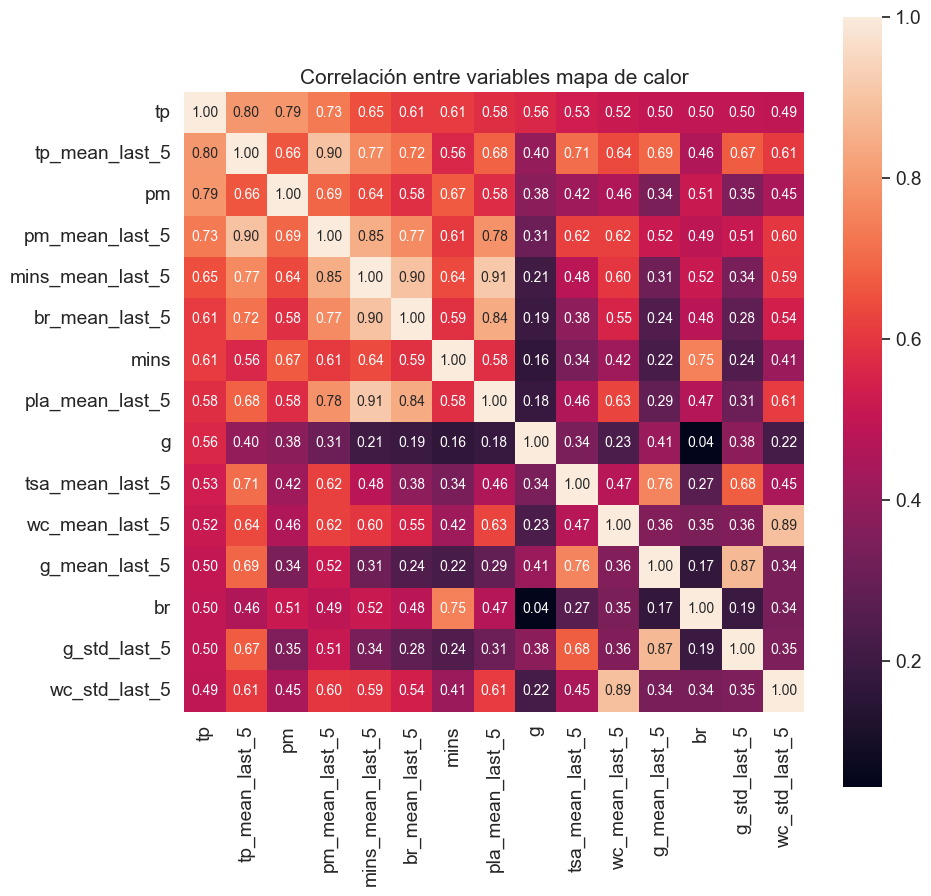

In [63]:
stats_corr = delanteros.corr()


k = 15
cols = stats_corr.nlargest(k, 'tp')['tp'].index
cm = np.corrcoef(delanteros[cols].values.T)
plt.figure(figsize=(10,10))
plt.title('Correlación entre variables mapa de calor')

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [64]:
delanteros_23 = delanteros[(delanteros['Jornada'] == 12) & (delanteros['Temporada'] == 2023)]
delanteros_23_actual = delanteros[(delanteros['Jornada'] == 12) & (delanteros['Temporada'] == 2023)]
delanteros_23.head()

,mins,tp,pm,g,ga,oaa,pae,wc,tsa,br,...,yc_mean_last_5,yc_std_last_5,syc_mean_last_5,syc_std_last_5,pf_mean_last_5,pf_std_last_5,pc_mean_last_5,pc_std_last_5,m_mean_last_5,m_std_last_5
index,,,,,,,,,,,,,,,,,,,,,
nahuel-molina,76,-1,1,0,0,0,0,1,0,3,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
adu-ares,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
djene,44,-1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
yan-couto,70,-1,0,0,0,0,1,1,0,2,...,0.0,0.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0,0.0
jaume-costa,90,-2,0,0,0,0,0,0,0,4,...,0.0,0.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
delanteros = delanteros[(delanteros['Jornada'] != 13) & (delanteros['Jornada'] != 12) &(delanteros['Temporada'] != 2023)]
delanteros.head()

,mins,tp,pm,g,ga,oaa,pae,wc,tsa,br,...,yc_mean_last_5,yc_std_last_5,syc_mean_last_5,syc_std_last_5,pf_mean_last_5,pf_std_last_5,pc_mean_last_5,pc_std_last_5,m_mean_last_5,m_std_last_5
index,,,,,,,,,,,,,,,,,,,,,
alberto-moreno,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lejeune,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negredo,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yunus,3,-2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yuri,90,-1,1,0,0,0,0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#delanteros_23
suffixes_to_exclude = ['_last_5', 'Temporada', 'Jornada']
columns_to_reset = [col for col in delanteros_23.columns if not any(suffix in col for suffix in suffixes_to_exclude)]
delanteros_23[columns_to_reset] = 0
delanteros_23.head()

,mins,tp,pm,g,ga,oaa,pae,wc,tsa,br,...,yc_mean_last_5,yc_std_last_5,syc_mean_last_5,syc_std_last_5,pf_mean_last_5,pf_std_last_5,pc_mean_last_5,pc_std_last_5,m_mean_last_5,m_std_last_5
index,,,,,,,,,,,,,,,,,,,,,
nahuel-molina,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
adu-ares,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
djene,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
yan-couto,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0,0.0
jaume-costa,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
X = delanteros.drop(['mins', 'tp','pm'], axis=1)  # Features
y = delanteros['tp']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
feature_importance_df.head(10)


Feature Importance:


,Feature,Importance
18,tp_mean_last_5,0.566013
0,g,0.157014
7,pla,0.089595
19,tp_std_last_5,0.040984
1,ga,0.037504
6,br,0.017028
15,Jornada,0.006510
17,mins_std_last_5,0.006342
37,pla_std_last_5,0.005663
35,br_std_last_5,0.005119


In [73]:
feature_importance_df['Feature']

18      tp_mean_last_5
0                    g
7                  pla
19       tp_std_last_5
1                   ga
6                   br
15             Jornada
17     mins_std_last_5
37      pla_std_last_5
35       br_std_last_5
16    mins_mean_last_5
36     pla_mean_last_5
34      br_mean_last_5
4                   wc
2                  oaa
21       pm_std_last_5
20      pm_mean_last_5
12                  pc
31       wc_std_last_5
8                   rc
5                  tsa
14           Temporada
3                  pae
33      tsa_std_last_5
30      wc_mean_last_5
29      pae_std_last_5
9                   yc
28     pae_mean_last_5
32     tsa_mean_last_5
26     oaa_mean_last_5
27      oaa_std_last_5
40      yc_mean_last_5
22       g_mean_last_5
23        g_std_last_5
25       ga_std_last_5
24      ga_mean_last_5
41       yc_std_last_5
48       m_mean_last_5
47       pc_std_last_5
10                 syc
46      pc_mean_last_5
39       rc_std_last_5
38      rc_mean_last_5
49        m

In [ ]:
top_n_features = feature_importance_df.head(10)['Feature'].tolist()

X_train_top = X_train[top_n_features]
X_test_top = X_test[top_n_features]

rf.fit(X_train_top, y_train)


score_top = rf.score(X_test_top, y_test)
print(f"Score on the test set with top features: {score_top:.2f}")

mse_top = np.mean((y - rf.predict(X[top_n_features]))**2)
print("Error de predicción with top features:", mse_top)


In [70]:
top_n_features

NameError: name 'top_n_features' is not defined

In [45]:
delanteros_23

,mins,tp,pm,g,ga,oaa,pae,wc,tsa,br,...,yc_mean_last_3,yc_std_last_3,syc_mean_last_3,syc_std_last_3,pf_mean_last_3,pf_std_last_3,pc_mean_last_3,pc_std_last_3,m_mean_last_3,m_std_last_3
index,,,,,,,,,,,,,,,,,,,,,
gerard,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.57735,0.000000,0.00000,0.0,0.0,0.333333,0.57735,1.0,0.0
araujo,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.57735,0.000000,0.00000,0.0,0.0,0.333333,0.57735,1.0,0.0
sedlar,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.57735,0.000000,0.00000,0.0,0.0,0.333333,0.57735,1.0,0.0
dovbyk,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,1.0,0.0
miranda,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dani-garcia,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00000,0.333333,0.57735,0.0,0.0,0.000000,0.00000,1.0,0.0
alena,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.57735,0.000000,0.00000,0.0,0.0,0.000000,0.00000,1.0,0.0
de-marcos,0,0,0,0,0,0,0,0,0,0,...,0.666667,0.57735,0.000000,0.00000,0.0,0.0,0.000000,0.00000,1.0,0.0


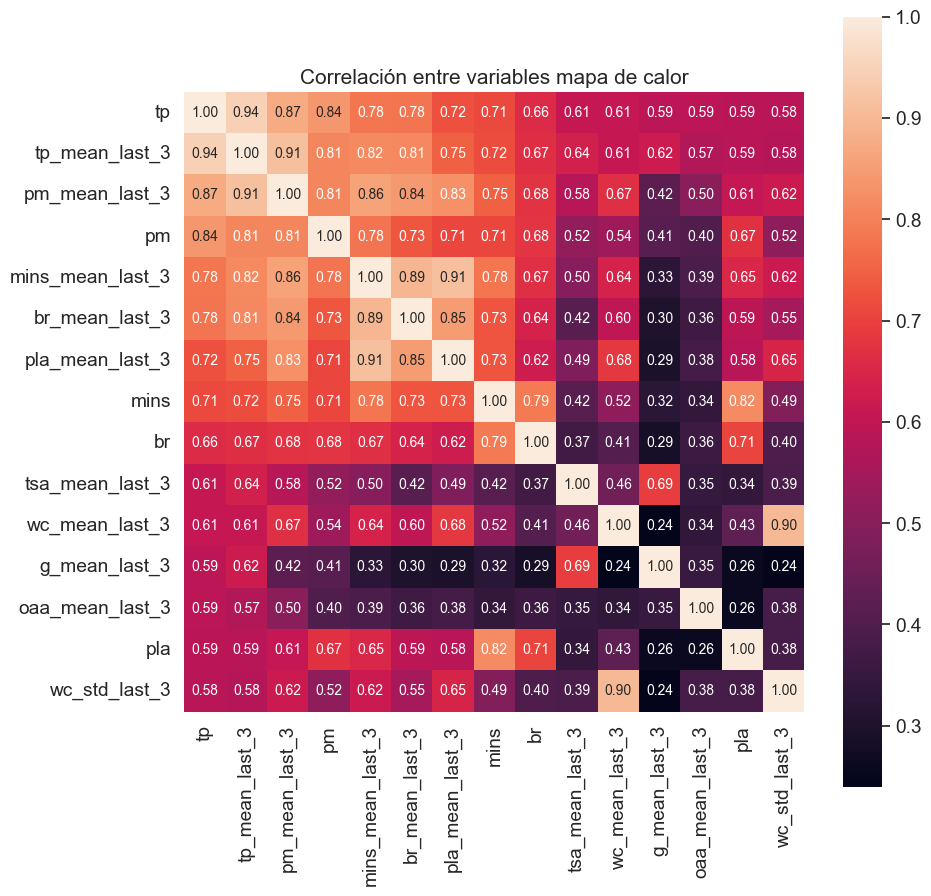

In [47]:
stats_corr = delanteros_23_actual.corr()


k = 15
cols = stats_corr.nlargest(k, 'tp')['tp'].index
cm = np.corrcoef(delanteros_23_actual[cols].values.T)
plt.figure(figsize=(10,10))
plt.title('Correlación entre variables mapa de calor')

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [41]:
X_pred = delanteros_23.drop(['tp','mins'], axis=1)  # Features
y_real = delanteros_23_actual['tp']
# Calcular las predicciones
predicciones = rf.predict(X_pred[top_n_features])

# Calcular el error
error = np.mean((y_real - predicciones)**2)

# Imprimir el error
print("Error:", error)


Error: 1.0857096359743044
